## Predicting air pollution parameter 'y' in the city.

In [1]:
# Import libraries necessary for this task
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display 
# Pretty display for notebooks
%matplotlib inline

In [2]:
# Import and read the data file.
inputdata = pd.read_csv("Data/forecasting_dataset.csv")
# Success
print ("Forecasting dataset has {} data points with {} variables each.".format(*inputdata.shape))

Forecasting dataset has 8421 data points with 16 variables each.


### Data Exploration

In [3]:
#Check the data types for each column.
inputdata.dtypes

date      object
time      object
y          int64
co_gt    float64
nhmc     float64
c6h6     float64
s2       float64
nox      float64
s3       float64
no2      float64
s4       float64
s5       float64
t        float64
rh       float64
ah       float64
level     object
dtype: object

In [4]:
#Display first 5 rows of the file
display(inputdata[:5])

date      time     y  co_gt   nhmc  c6h6      s2    nox     s3  \
0  10/13/2004  20:00:00   943 -200.0 -200.0   7.2   867.0 -200.0  834.0   
1   8/10/2004   3:00:00   919    0.5 -200.0   3.9   704.0 -200.0  861.0   
2   6/21/2004   8:00:00  1221    3.7 -200.0  23.3  1386.0    NaN  626.0   
3   7/12/2004  12:00:00  1024    2.1 -200.0  12.1  1052.0  183.0  779.0   
4  12/14/2004  12:00:00  1377    4.4 -200.0  21.7  1342.0  786.0  499.0   

     no2      s4      s5     t    rh      ah level  
0 -200.0  1314.0   891.0  14.8  57.3  0.9603   NaN  
1 -200.0  1603.0   860.0  24.4  65.0  1.9612   Low  
2  109.0  2138.0     NaN  23.3  38.6  1.0919  High  
3    NaN  1690.0   952.0  28.5  27.3  1.0479  High  
4  206.0  1546.0  2006.0  12.9  54.1  0.8003  High

#### The data is not sorted in date and time. 

In [5]:
#Combining date and time columns into a new column 'Datetime'.
inputdata['Datetime'] = pd.to_datetime(inputdata['date'].apply(str)+' '+inputdata['time'])

In [6]:
display(inputdata[:5])

date      time     y  co_gt   nhmc  c6h6      s2    nox     s3  \
0  10/13/2004  20:00:00   943 -200.0 -200.0   7.2   867.0 -200.0  834.0   
1   8/10/2004   3:00:00   919    0.5 -200.0   3.9   704.0 -200.0  861.0   
2   6/21/2004   8:00:00  1221    3.7 -200.0  23.3  1386.0    NaN  626.0   
3   7/12/2004  12:00:00  1024    2.1 -200.0  12.1  1052.0  183.0  779.0   
4  12/14/2004  12:00:00  1377    4.4 -200.0  21.7  1342.0  786.0  499.0   

     no2      s4      s5     t    rh      ah level            Datetime  
0 -200.0  1314.0   891.0  14.8  57.3  0.9603   NaN 2004-10-13 20:00:00  
1 -200.0  1603.0   860.0  24.4  65.0  1.9612   Low 2004-08-10 03:00:00  
2  109.0  2138.0     NaN  23.3  38.6  1.0919  High 2004-06-21 08:00:00  
3    NaN  1690.0   952.0  28.5  27.3  1.0479  High 2004-07-12 12:00:00  
4  206.0  1546.0  2006.0  12.9  54.1  0.8003  High 2004-12-14 12:00:00

In [7]:
#Sorting this column.
data = inputdata.sort_values('Datetime')

In [8]:
#Display first 5 rows of the date and time sorted data.
display(data[:5])

date      time     y  co_gt   nhmc  c6h6     s2    nox      s3  \
3974  3/10/2004  18:00:00  1360    2.6  150.0  11.9    NaN  166.0  1056.0   
6374  3/10/2004  19:00:00  1292    2.0  112.0   9.4  955.0  103.0  1174.0   
883   3/10/2004  20:00:00  1402    2.2   88.0   9.0  939.0  131.0  1140.0   
5937  3/10/2004  21:00:00  1376    2.2   80.0   9.2  948.0  172.0  1092.0   
8292  3/10/2004  22:00:00  1272    1.6   51.0   6.5  836.0  131.0  1205.0   

        no2      s4      s5     t    rh      ah level            Datetime  
3974  113.0  1692.0     NaN  13.6  48.9  0.7578  High 2004-03-10 18:00:00  
6374   92.0  1559.0   972.0  13.3  47.7  0.7255  High 2004-03-10 19:00:00  
883   114.0  1555.0  1074.0  11.9   NaN  0.7502   NaN 2004-03-10 20:00:00  
5937  122.0  1584.0  1203.0  11.0  60.0  0.7867  High 2004-03-10 21:00:00  
8292  116.0     NaN  1110.0   NaN  59.6  0.7888  High 2004-03-10 22:00:00

y


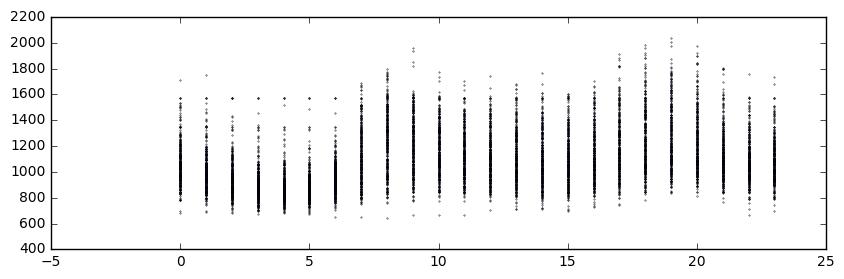

co_gt


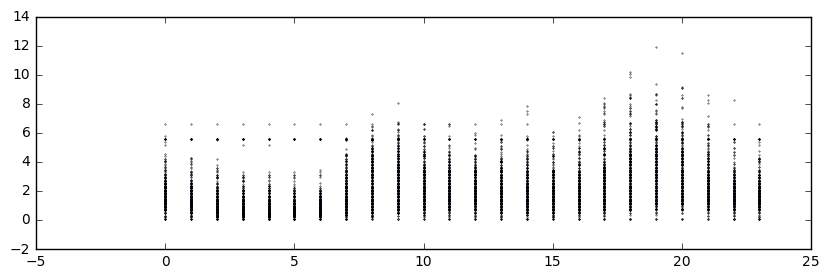

nhmc


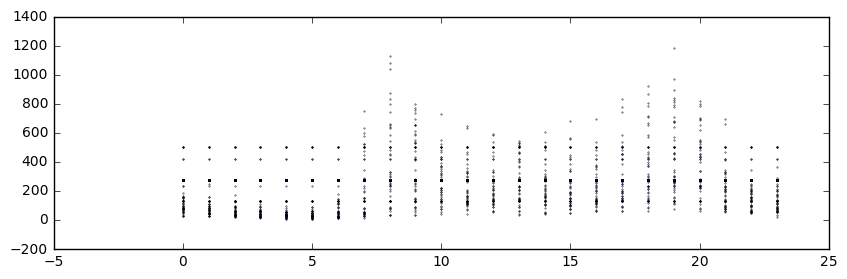

c6h6


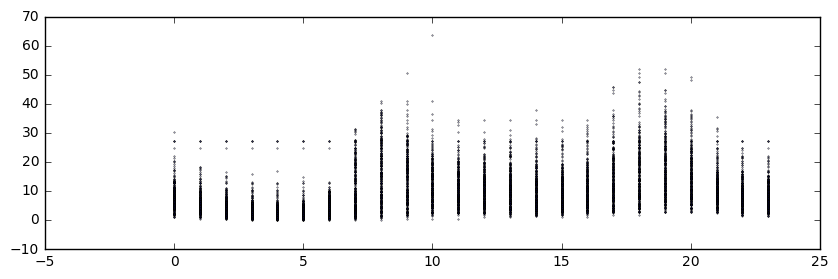

s2


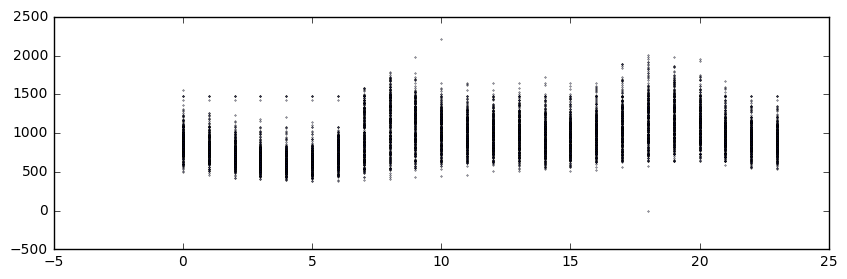

nox


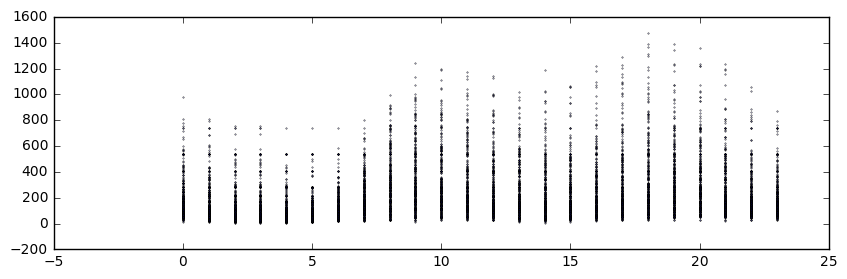

s3


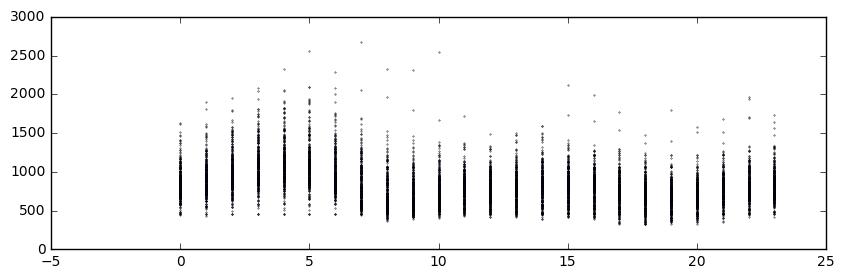

no2


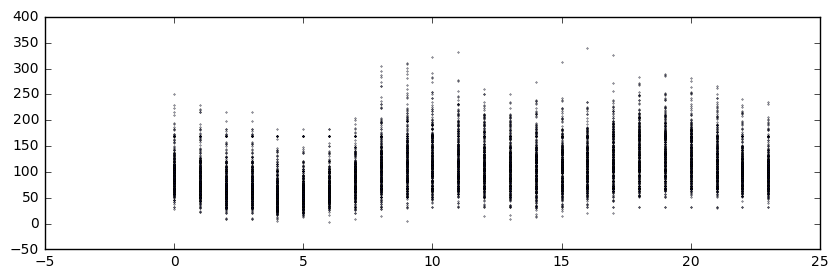

s4


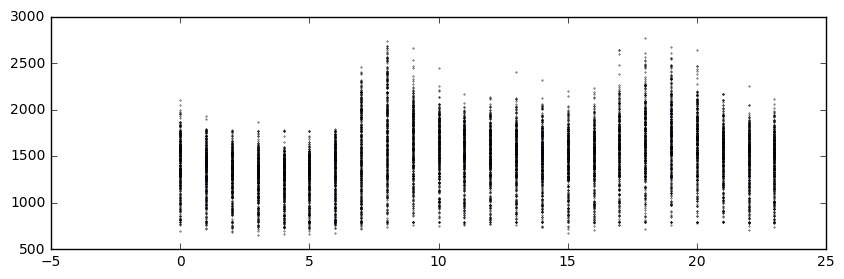

s5


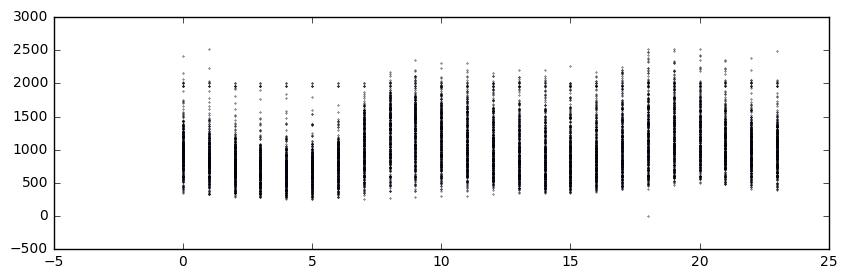

t


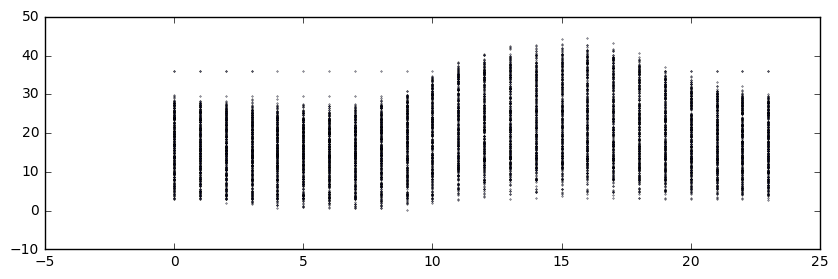

rh


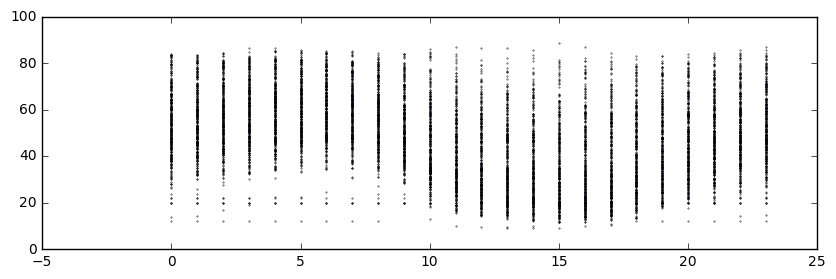

ah


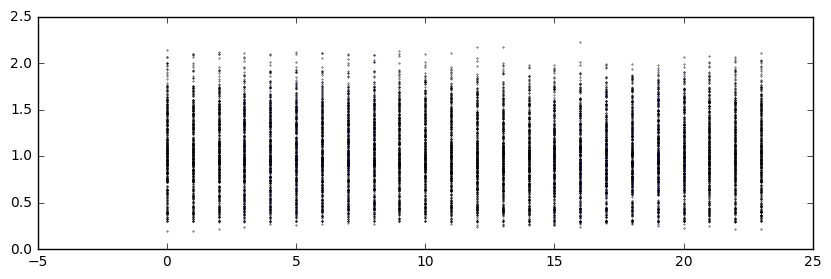

hr


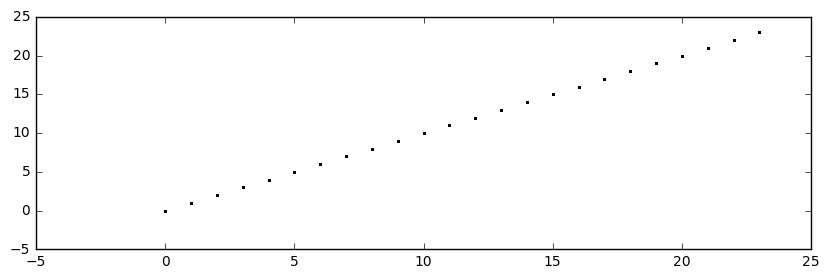

mo


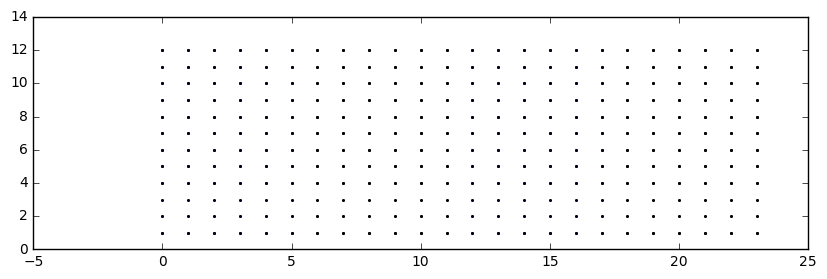

In [13]:
#Create hour column
data['hr'] = data.time.apply(lambda x : x.split()[0].split(":")[0])
#Create month column
data['mo'] = data.date.apply(lambda x : x.split()[0].split("/")[0])
#Check hourly changes in each of the parameters.
data_all = data.drop(['date','time','Datetime','level'],axis=1)
for e in data_all.columns.values:
    print(e)
    fig = plt.figure(figsize=(10,3))
    ax = fig.add_subplot(111)
    plt.scatter(data_all['hr'],data_all[e],s=0.1)
    plt.show()

In [10]:
#Check for missing values
data.isnull().sum()

date          0
time          0
y             0
co_gt       441
nhmc        434
c6h6        413
s2          421
nox         425
s3          416
no2         455
s4          394
s5          400
t           424
rh          436
ah          425
level       418
Datetime      0
hr            0
mo            0
dtype: int64

In [11]:
#Descriptive statistics for the data
data.describe()

/home/akshaya/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


y        co_gt         nhmc         c6h6           s2  \
count  8421.000000  7980.000000  7987.000000  8008.000000  8000.000000   
mean   1042.105926   -37.626153  -154.691373     1.134540   898.965250   
std     340.287650    80.407058   147.073276    43.563292   350.196842   
min    -200.000000  -200.000000  -200.000000  -200.000000  -200.000000   
25%     915.000000          NaN          NaN          NaN          NaN   
50%    1050.000000          NaN          NaN          NaN          NaN   
75%    1220.000000          NaN          NaN          NaN          NaN   
max    2040.000000    11.900000  1189.000000    63.700000  2214.000000   

               nox           s3          no2           s4           s5  \
count  7996.000000  8005.000000  7966.000000  8027.000000  8021.000000   
mean    156.620060   801.763398    50.172483  1414.505295   970.777709   
std     260.224266   328.978770   129.871132   478.101456   459.593401   
min    -200.000000  -200.000000  -200.000000  -200.000000  -200.000000   
25%            NaN          NaN          NaN          NaN          NaN   
50%            NaN          NaN          NaN          NaN          NaN   
75%            NaN          NaN          NaN          NaN          NaN   
max    1479.000000  2683.000000   340.000000  2775.000000  2523.000000   

                 t           rh           ah  
count  7997.000000  7985.000000  7996.000000  
mean      9.904877    38.029105    -7.792764  
std      44.466069    53.944638    41.250356  
min    -200.000000  -200.000000  -200.000000  
25%            NaN          NaN          NaN  
50%            NaN          NaN          NaN  
75%            NaN          NaN          NaN  
max      44.600000    88.700000     2.231000

#### There are some null values in all columns except date, time, and y. The minimum value in each column is -200 which seems like a missing value (also apparent in the hourly plots shown above). It will be more clear after looking at the distributions of each feature. 

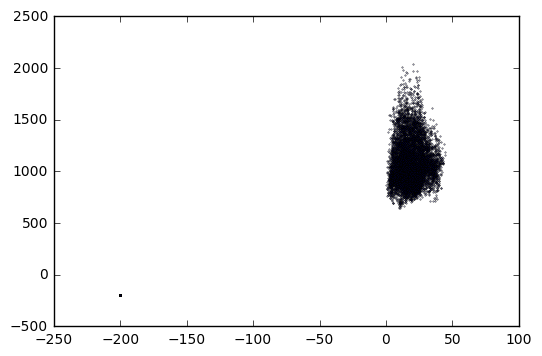

In [10]:
#Example scatter plot
plt.scatter(data['t'],data['y'],s=0.1)

#### Instead of plotting individual features, let's look at the scattar matrix. 

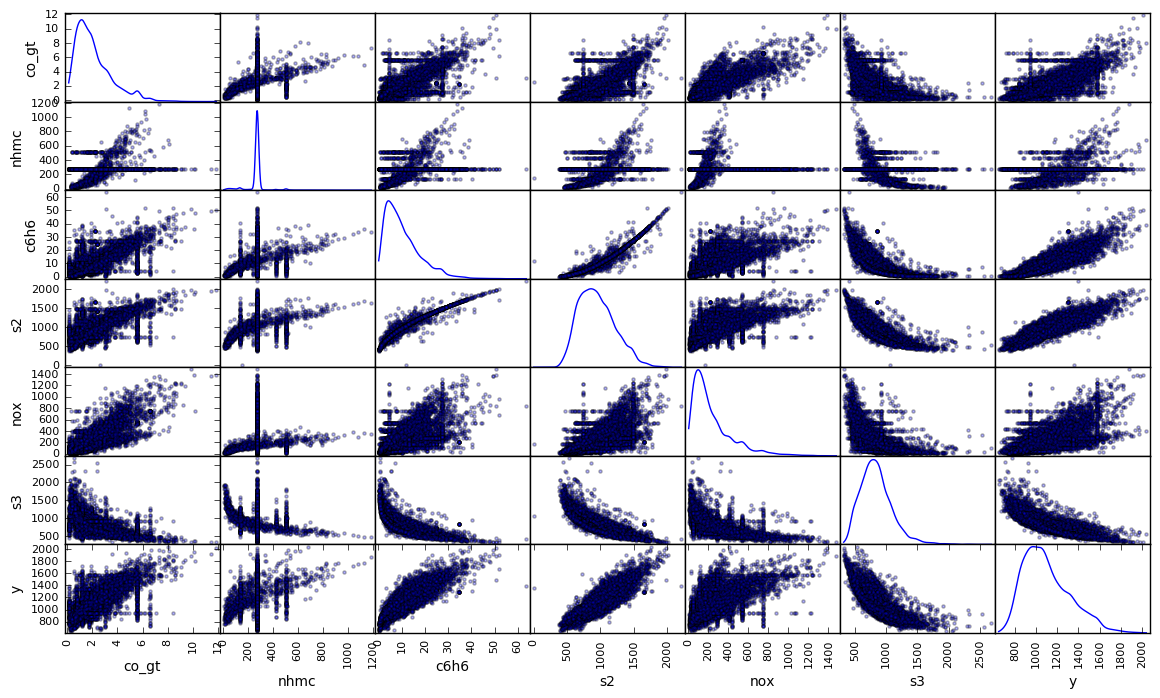

In [14]:
#Plot scatter matrix for all features

params = ['co_gt', 'nhmc', 'c6h6', 's2', 'nox', 's3', 'y']
pd.scatter_matrix(data[params], alpha = 0.3, figsize = (14,8), diagonal = 'kde');

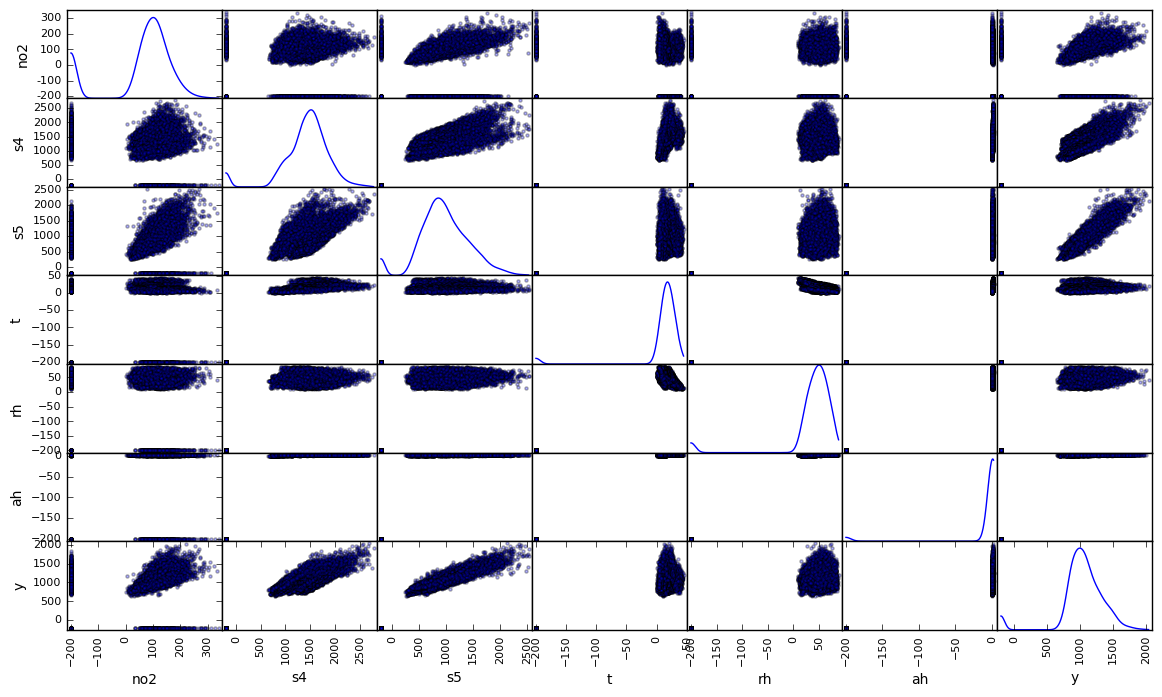

In [12]:
#Plot scatter matrix for all features

params = ['no2','s4', 's5', 't', 'rh', 'ah','y']
pd.scatter_matrix(data[params], alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Data preprocessing

#### After analyzing each of these distributions, it can be seen that the distributions have values greater than 0 and the '-200' does not seem to correspond to the actual distribution so first I replace the value '-200' with 0. 

#### There are multiple ways to replace these 0s in the data. One way could be to replace these with mean/median of each column. But after looking at their hourly patterns, it is apparent that each parameter changes hourly and if we replace 0s with mean/median of each column then it will not represent the most probable value of the parameter at that instant. To confirm this, I also plot the scatter matrix when the 0s and 'NaN's are replaced by mean of each column shown below.

In [10]:
data2 = data.copy()

In [49]:
#Replace the value '-200' with 0.
for i in data2.ix[data2['y']<0].index:
    data2.loc[i, 'y'] = 0
for i in data2.ix[data2['co_gt']<0].index:
    data2.loc[i, 'co_gt'] = 0
for i in data2.ix[data2['nhmc']<0].index:
    data2.loc[i, 'nhmc'] = 0
for i in data2.ix[data2['c6h6']<0].index:
    data2.loc[i, 'c6h6'] = 0
for i in data2.ix[data2['s2']<0].index:
    data2.loc[i, 's2'] = 0
for i in data2.ix[data2['nox']<0].index:
    data2.loc[i, 'nox'] = 0
for i in data2.ix[data2['s3']<0].index:
    data2.loc[i, 's3'] = 0
for i in data2.ix[data2['no2']<0].index:
    data2.loc[i, 'no2'] = 0
for i in data2.ix[data2['s4']<0].index:
    data2.loc[i, 's4'] = 0
for i in data2.ix[data2['s5']<0].index:
    data2.loc[i, 's5'] = 0
for i in data2.ix[data2['t']<0].index:
    data2.loc[i, 't'] = 0
for i in data2.ix[data2['rh']<0].index:
    data2.loc[i, 'rh'] = 0
for i in data2.ix[data2['ah']<0].index:
    data2.loc[i, 'ah'] = 0

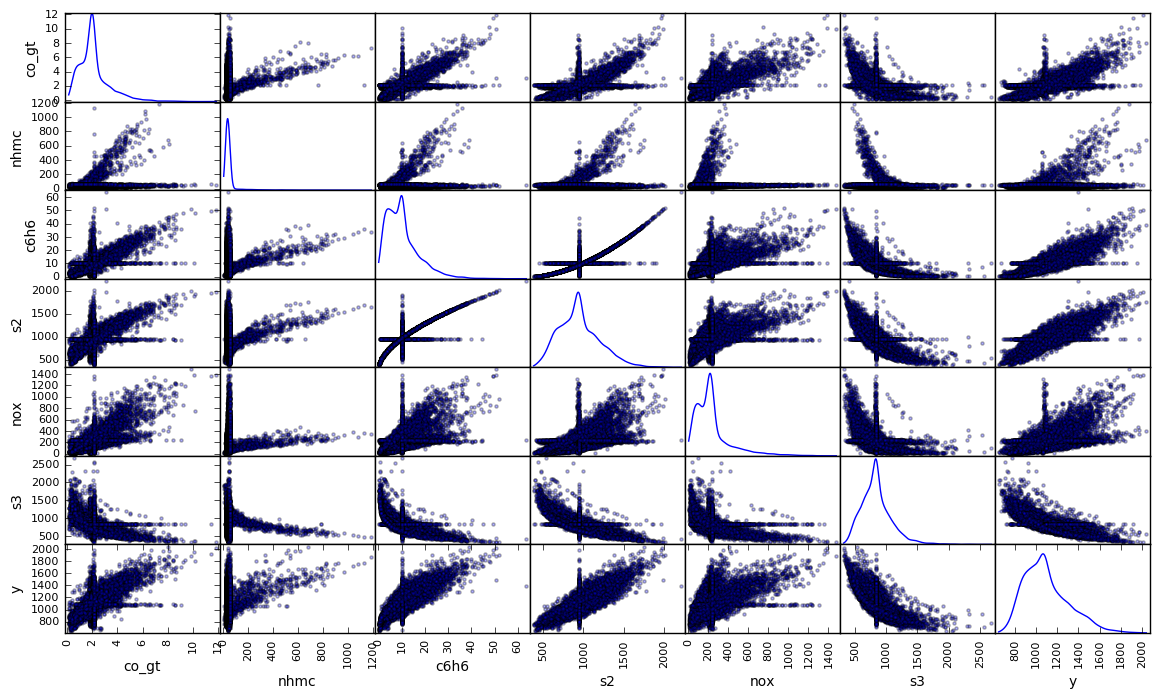

In [51]:
#Replacing 0s with the mean  of each column.
for i in data2.ix[data2['co_gt']==0].index:
    data2.loc[i, 'co_gt'] = data2['co_gt'].mean()
for i in data2.ix[data2['nhmc']==0].index:
    data2.loc[i, 'nhmc'] = data2['nhmc'].mean()
for i in data2.ix[data2['c6h6']==0].index:
    data2.loc[i, 'c6h6'] = data2['c6h6'].mean()
for i in data2.ix[data2['s2']==0].index:
    data2.loc[i, 's2'] = data2['s2'].mean()
for i in data2.ix[data2['nox']==0].index:
    data2.loc[i, 'nox'] = data2['nox'].mean()
for i in data2.ix[data2['s3']==0].index:
    data2.loc[i, 's3'] = data2['s3'].mean()
for i in data2.ix[data2['no2']==0].index:
    data2.loc[i, 'no2'] = data2['no2'].mean()
for i in data2.ix[data2['s4']==0].index:
    data2.loc[i, 's4'] = data2['s4'].mean()
for i in data2.ix[data2['s5']==0].index:
    data2.loc[i, 's5'] = data2['s5'].mean()
for i in data2.ix[data2['t']==0].index:
    data2.loc[i, 't'] = data2['t'].mean()
for i in data2.ix[data2['rh']==0].index:
    data2.loc[i, 'rh'] = data2['rh'].mean()
for i in data2.ix[data2['ah']==0].index:
    data2.loc[i, 'ah'] = data2['ah'].mean()
for i in data2.ix[data2['y']==0].index:
    data2.loc[i, 'y'] = data2['y'].mean()
    
#Replace NaN with the mean of each column.
data2['co_gt'] = data2['co_gt'].fillna((data2['co_gt'].mean()))
data2['nhmc'] = data2['nhmc'].fillna((data2['nhmc'].mean()))
data2['c6h6'] = data2['c6h6'].fillna((data2['c6h6'].mean()))
data2['s2'] = data2['s2'].fillna((data2['s2'].mean()))
data2['nox'] = data2['nox'].fillna((data2['nox'].mean()))
data2['s3'] = data2['s3'].fillna((data2['s3'].mean()))
data2['no2'] = data2['no2'].fillna((data2['no2'].mean()))
data2['s4'] = data2['s4'].fillna((data2['s4'].mean()))
data2['s5'] = data2['s5'].fillna((data2['s5'].mean()))
data2['t'] = data2['t'].fillna((data2['t'].mean()))
data2['rh'] = data2['rh'].fillna((data2['rh'].mean()))
data2['ah'] = data2['ah'].fillna((data2['ah'].mean()))
#data['level'] = data['level'].fillna((data['level'].mean()))

#Plot scatter matrix for all features
params = ['co_gt', 'nhmc', 'c6h6', 's2', 'nox', 's3', 'y']
pd.scatter_matrix(data2[params], alpha = 0.3, figsize = (14,8), diagonal = 'kde');

#### To avoid this, either 0s and 'NaN's can be replaced with the average of previous and next value or just with the previous value.  If the hour and month information is to be available when feeding into the model then it would be more reasonable to replace these values with monthly averages of that particular hour. Here I am replacing it with the previous value of that parameter.

In [9]:
#Replace the value '-200' with 0.
for i in data.ix[data['y']<0].index:
    data.loc[i, 'y'] = 0
for i in data.ix[data['co_gt']<0].index:
    data.loc[i, 'co_gt'] = 0
for i in data.ix[data['nhmc']<0].index:
    data.loc[i, 'nhmc'] = 0
for i in data.ix[data['c6h6']<0].index:
    data.loc[i, 'c6h6'] = 0
for i in data.ix[data['s2']<0].index:
    data.loc[i, 's2'] = 0
for i in data.ix[data['nox']<0].index:
    data.loc[i, 'nox'] = 0
for i in data.ix[data['s3']<0].index:
    data.loc[i, 's3'] = 0
for i in data.ix[data['no2']<0].index:
    data.loc[i, 'no2'] = 0
for i in data.ix[data['s4']<0].index:
    data.loc[i, 's4'] = 0
for i in data.ix[data['s5']<0].index:
    data.loc[i, 's5'] = 0
for i in data.ix[data['t']<0].index:
    data.loc[i, 't'] = 0
for i in data.ix[data['rh']<0].index:
    data.loc[i, 'rh'] = 0
for i in data.ix[data['ah']<0].index:
    data.loc[i, 'ah'] = 0

In [10]:
#Replace NaN with 0
data['co_gt'] = data['co_gt'].fillna(0)
data['nhmc'] = data['nhmc'].fillna(0)
data['c6h6'] = data['c6h6'].fillna(0)
data['s2'] = data['s2'].fillna(0)
data['nox'] = data['nox'].fillna(0)
data['s3'] = data['s3'].fillna(0)
data['no2'] = data['no2'].fillna(0)
data['s4'] = data['s4'].fillna(0)
data['s5'] = data['s5'].fillna(0)
data['t'] = data['t'].fillna(0)
data['rh'] = data['rh'].fillna(0)
data['ah'] = data['ah'].fillna(0)

In [11]:
#Replace 0 with previous values 
data['co_gt'].replace(to_replace=0, method='ffill', inplace=True)
data['nhmc'].replace(to_replace=0, method='ffill', inplace=True)
data['c6h6'].replace(to_replace=0, method='ffill', inplace=True)
data['s2'].replace(to_replace=0, method='ffill', inplace=True)
data['nox'].replace(to_replace=0, method='ffill', inplace=True)
data['s3'].replace(to_replace=0, method='ffill', inplace=True)
data['no2'].replace(to_replace=0, method='ffill', inplace=True)
data['s4'].replace(to_replace=0, method='ffill', inplace=True)
data['s5'].replace(to_replace=0, method='ffill', inplace=True)
data['t'].replace(to_replace=0, method='ffill', inplace=True)
data['rh'].replace(to_replace=0, method='ffill', inplace=True)
data['ah'].replace(to_replace=0, method='ffill', inplace=True)
data['y'].replace(to_replace=0, method='ffill', inplace=True)

y


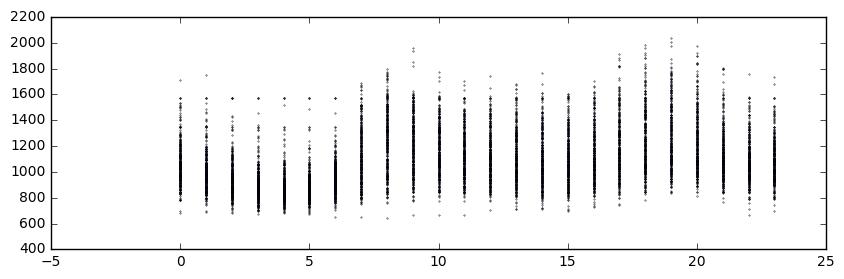

co_gt


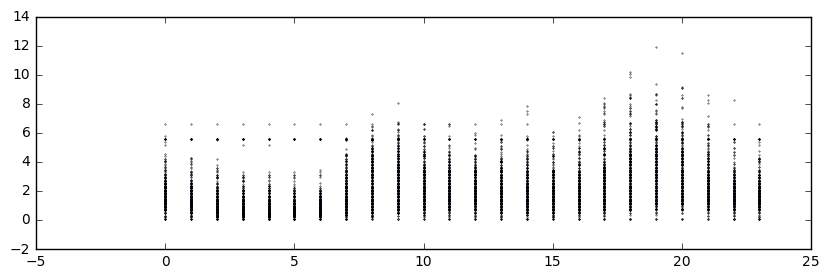

nhmc


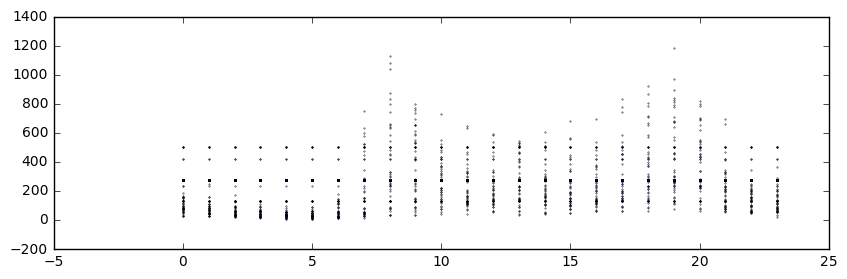

c6h6


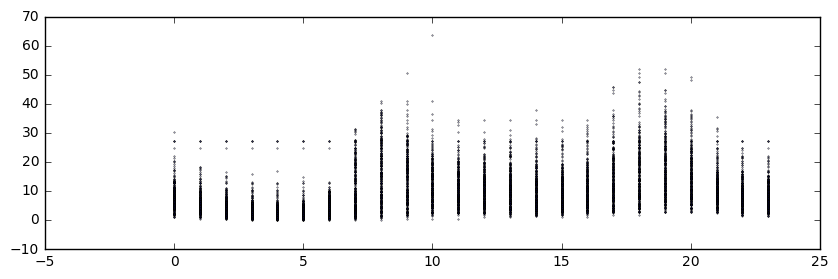

s2


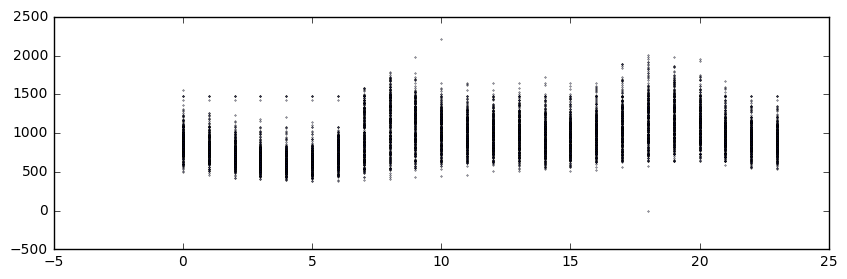

nox


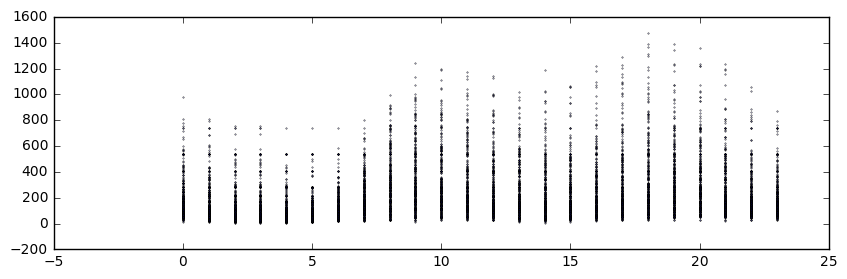

s3


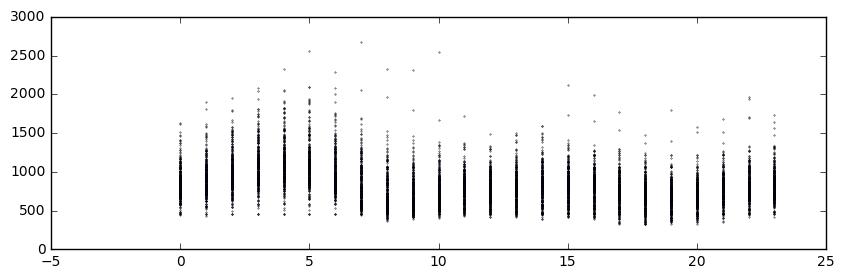

no2


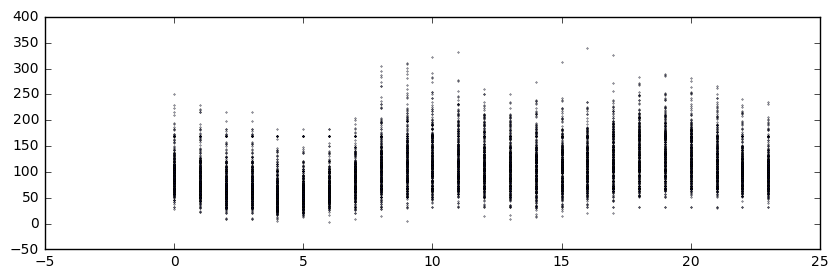

s4


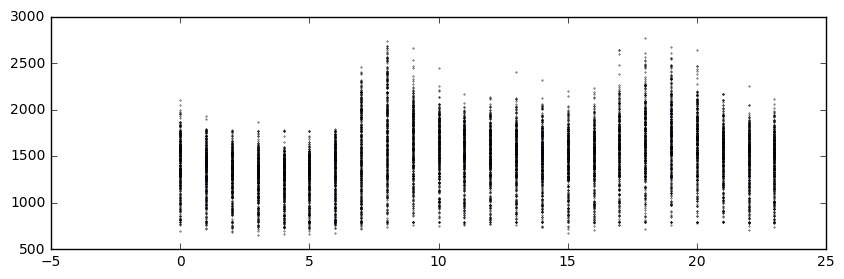

s5


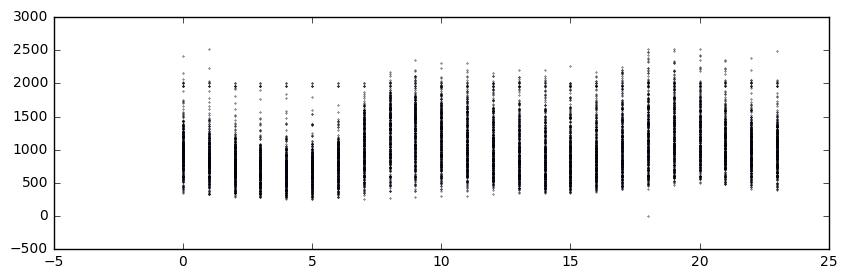

t


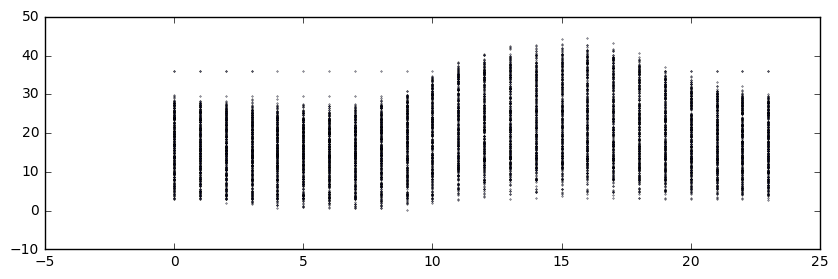

rh


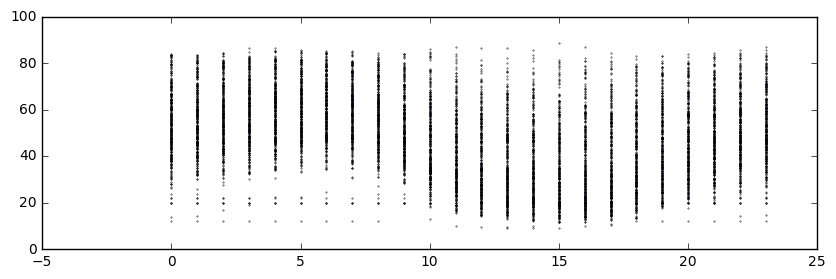

ah


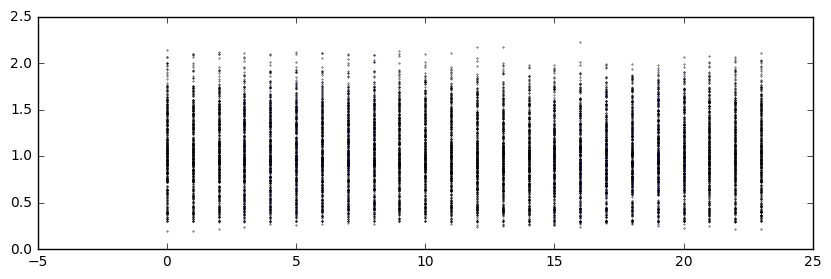

hr


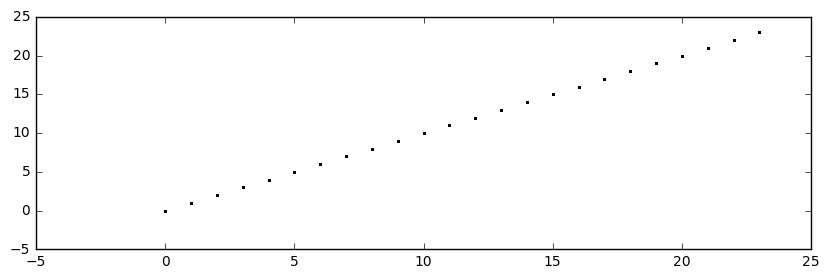

mo


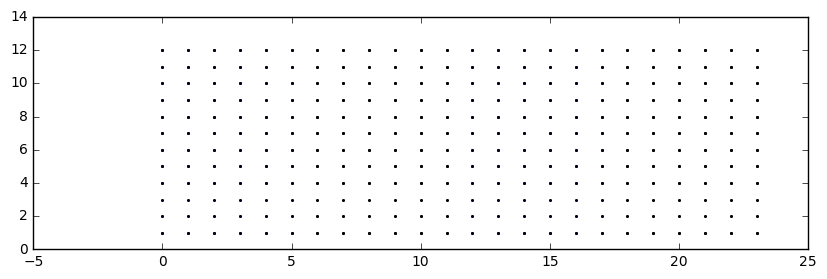

In [15]:
data_num = data.drop(['date','time','Datetime','level'],axis=1)
#Check hourly changes in each of the parameters.

for e in data_num.columns.values:
    print(e)
    fig = plt.figure(figsize=(10,3))
    ax = fig.add_subplot(111)
    plt.scatter(data_num['hr'],data_num[e],s=0.1)
    plt.show()

#### The outliers present in the data could also be replaced with the hourly averages. 

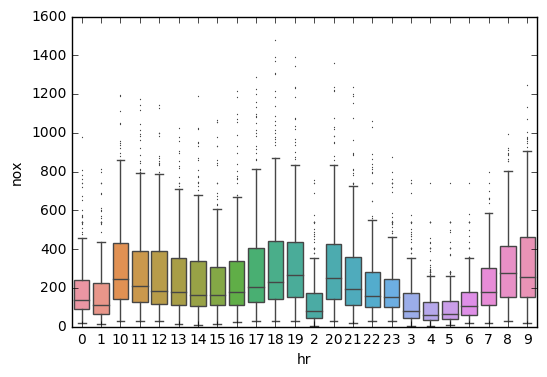

In [19]:
sns.boxplot(data['hr'], data['nox'],fliersize=0.5)

In [17]:
data.describe()

y        co_gt         nhmc         c6h6           s2  \
count  8421.000000  8421.000000  8421.000000  8421.000000  8421.000000   
mean   1101.627716     2.100238   269.876855    10.418549   951.715117   
std     221.690868     1.481297    77.506992     7.648644   270.692241   
min     647.000000     0.100000     7.000000     0.100000     0.000000   
25%     936.000000     1.000000   275.000000     4.600000   741.000000   
50%    1060.000000     1.700000   275.000000     8.500000   923.000000   
75%    1237.000000     2.800000   275.000000    14.200000  1125.000000   
max    2040.000000    11.900000  1189.000000    63.700000  2214.000000   

               nox           s3          no2           s4           s5  \
count  8421.000000  8421.000000  8421.000000  8421.000000  8421.000000   
mean    235.354946   842.574872   106.125995  1483.034081  1031.451847   
std     207.998316   256.739548    46.670540   340.041832   410.367307   
min       2.000000   322.000000     3.000000   657.000000     0.000000   
25%      91.000000   666.000000    71.000000  1278.000000   728.000000   
50%     165.000000   816.000000   101.000000  1490.000000   962.000000   
75%     308.000000   980.000000   133.000000  1699.000000  1286.000000   
max    1479.000000  2683.000000   340.000000  2775.000000  2523.000000   

                 t           rh           ah  
count  8421.000000  8421.000000  8421.000000  
mean     18.935376    48.663484     1.048554  
std       8.818900    17.399531     0.404317  
min       0.300000     9.200000     0.198800  
25%      12.400000    35.200000     0.759800  
50%      18.400000    48.800000     1.018700  
75%      25.000000    61.700000     1.347900  
max      44.600000    88.700000     2.231000

In [16]:
data.isnull().sum()

date          0
time          0
y             0
co_gt         0
nhmc          0
c6h6          0
s2            0
nox           0
s3            0
no2           0
s4            0
s5            0
t             0
rh            0
ah            0
level       418
Datetime      0
hr            0
mo            0
dtype: int64

#### One-hot encoding the level values.

In [17]:
#Convert the 'level' categorical values to numerical values.
data["level"] = data["level"].astype('category')
data.dtypes

date                object
time                object
y                    int64
co_gt              float64
nhmc               float64
c6h6               float64
s2                 float64
nox                float64
s3                 float64
no2                float64
s4                 float64
s5                 float64
t                  float64
rh                 float64
ah                 float64
level             category
Datetime    datetime64[ns]
hr                  object
mo                  object
dtype: object

In [18]:
level_code = pd.get_dummies(data['level'])

In [19]:
# Encode the 'level' data to numerical values
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
#level_code = lb_make.fit_transform(level_final)

# Print the number of features after one-hot encoding
encoded = list(level_code.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

# Uncomment the following line to see the encoded feature names
print (encoded)

5 total features after one-hot encoding.
['High', 'Low', 'Moderate', 'Very High', 'Very low']


In [20]:
data['level_h'] = level_code['High']
data['level_vh'] = level_code['Very High']
data['level_vl'] = level_code['Very low']
data['level_l'] = level_code['Low']
data['level_m'] = level_code['Moderate']

In [21]:
display(data[:5])

date      time     y  co_gt   nhmc  c6h6     s2    nox      s3  \
3974  3/10/2004  18:00:00  1360    2.6  150.0  11.9    0.0  166.0  1056.0   
6374  3/10/2004  19:00:00  1292    2.0  112.0   9.4  955.0  103.0  1174.0   
883   3/10/2004  20:00:00  1402    2.2   88.0   9.0  939.0  131.0  1140.0   
5937  3/10/2004  21:00:00  1376    2.2   80.0   9.2  948.0  172.0  1092.0   
8292  3/10/2004  22:00:00  1272    1.6   51.0   6.5  836.0  131.0  1205.0   

        no2   ...         ah  level            Datetime  hr  mo level_h  \
3974  113.0   ...     0.7578   High 2004-03-10 18:00:00  18   3     1.0   
6374   92.0   ...     0.7255   High 2004-03-10 19:00:00  19   3     1.0   
883   114.0   ...     0.7502    NaN 2004-03-10 20:00:00  20   3     0.0   
5937  122.0   ...     0.7867   High 2004-03-10 21:00:00  21   3     1.0   
8292  116.0   ...     0.7888   High 2004-03-10 22:00:00  22   3     1.0   

     level_vh level_vl level_l  level_m  
3974      0.0      0.0     0.0      0.0  
6374      0.0      0.0     0.0      0.0  
883       0.0      0.0     0.0      0.0  
5937      0.0      0.0     0.0      0.0  
8292      0.0      0.0     0.0      0.0  

[5 rows x 24 columns]

#### The entries that had NaN values in the 'level' column could either have been removed or replaced with 0 considering it as additional category depeding on what information is available about this parameter.  Here I replace it with 0 as done in previous steps to maintain the sample size and to retain information for every hour in the training data set.

### Feature Observation

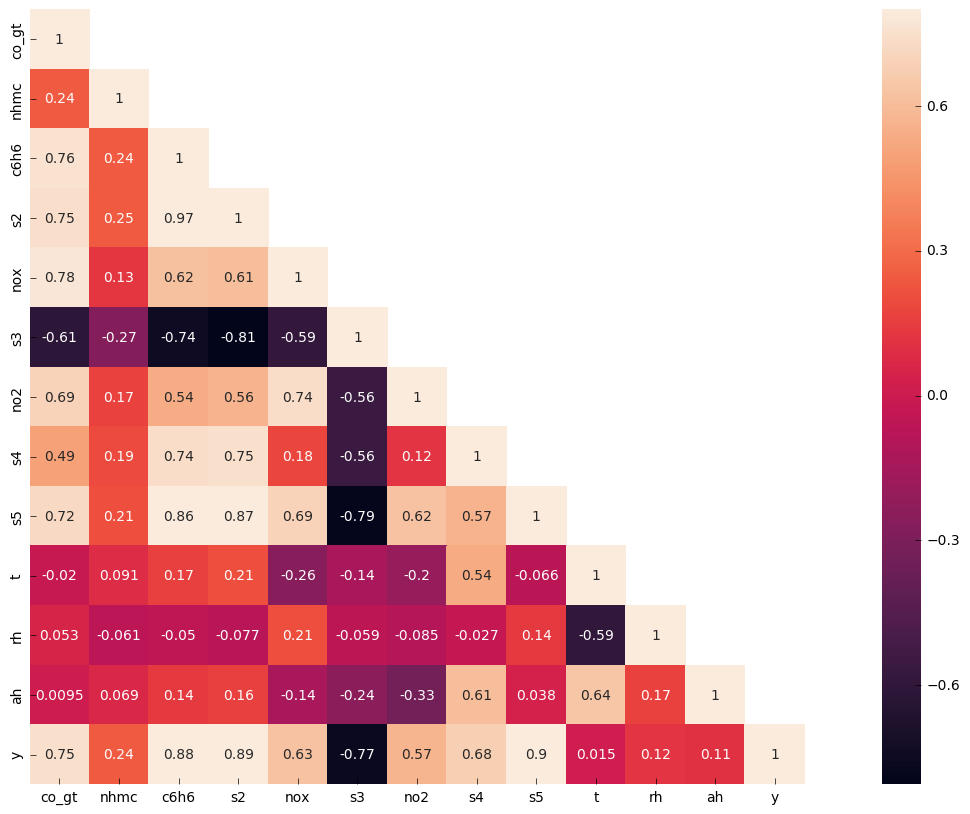

In [24]:
#Correlation matrix
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
corr = data[['co_gt', 'nhmc', 'c6h6', 's2', 'nox', 's3', 'no2','s4', 's5', 't', 'rh', 'ah', 'y']].corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False

sns.heatmap(corr, mask=mask,vmax=.8, square=True,annot=True)

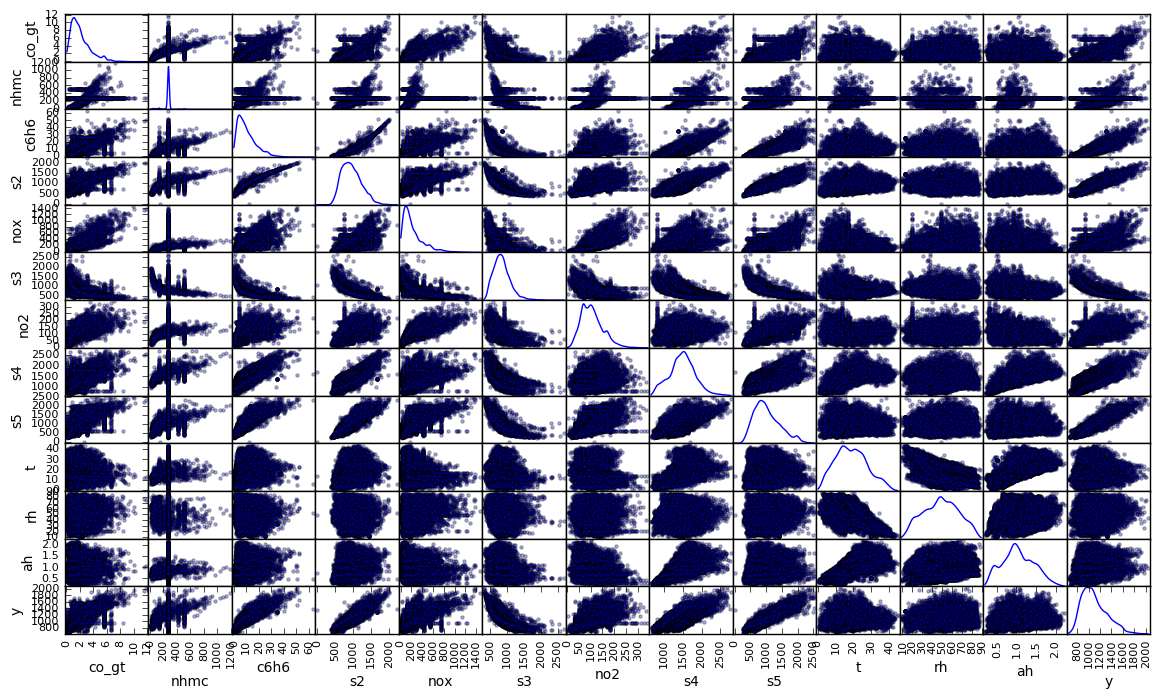

In [30]:
#Plot scatter matrix for all features

params = ['co_gt', 'nhmc', 'c6h6', 's2', 'nox', 's3',  'no2','s4', 's5', 't', 'rh', 'ah','y']
pd.scatter_matrix(data[params], alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Feature engineering

In [22]:
# Log-transform the skewed features
features_raw = data.drop(['date','time','Datetime','level','mo', 'nhmc'], axis = 1)
skewed = ['co_gt','c6h6', 'nox','s3']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

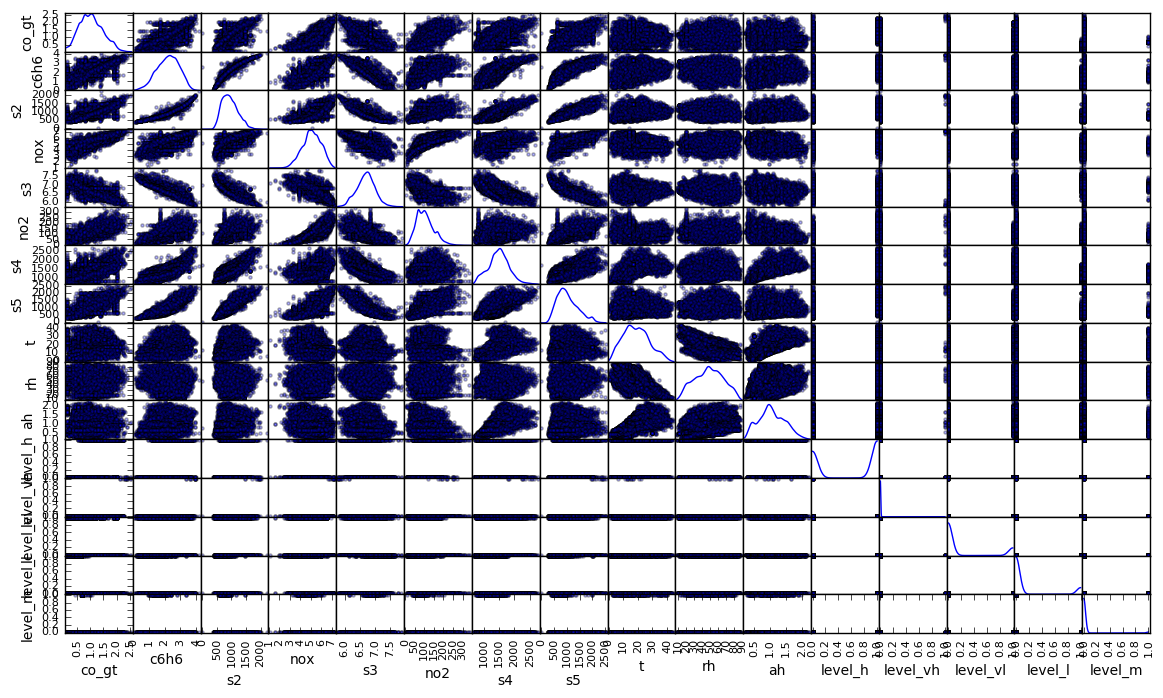

In [38]:
#Plot scatter matrix for all features

#params = ['co_gt', 'nhmc', 'c6h6', 's2', 'nox', 's3',  'no2','s4', 's5', 't', 'rh', 'ah','level','y']
pd.scatter_matrix(features_log_transformed, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

#### Now the features look normally distributed. Next the features are normalized. 

In [23]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['co_gt','c6h6', 'nox','s3', 's2', 'no2', 's4', 's5', 't','rh', 'ah']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 5))

y     co_gt      c6h6        s2       nox        s3       no2  \
3974  1360  0.481586  0.604233  0.000000  0.648163  0.559900  0.326409   
6374  1292  0.407529  0.551362  0.431346  0.571790  0.609882  0.264095   
883   1402  0.433744  0.541736  0.424119  0.610237  0.596015  0.329377   
5937  1376  0.433744  0.546596  0.428184  0.653856  0.575717  0.353116   
8292  1272  0.349403  0.471129  0.377597  0.610237  0.622181  0.335312   

            s4        s5         t        rh        ah  hr  level_h  level_vh  \
3974  0.488669  0.000000  0.300226  0.499371  0.275071  18      1.0       0.0   
6374  0.425873  0.385256  0.293454  0.484277  0.259177  19      1.0       0.0   
883   0.423985  0.425684  0.261851  0.484277  0.271332  20      0.0       0.0   
5937  0.437677  0.476813  0.241535  0.638994  0.289292  21      1.0       0.0   
8292  0.437677  0.439952  0.241535  0.633962  0.290326  22      1.0       0.0   

      level_vl  level_l  level_m  
3974       0.0      0.0      0.0  
6374       0.0      0.0      0.0  
883        0.0      0.0      0.0  
5937       0.0      0.0      0.0  
8292       0.0      0.0      0.0

In [24]:
#Make a new column showing the differences in y values for every 6 hours.
features_log_minmax_transform['ynew'] = features_log_minmax_transform.y.shift(-5)
features_log_minmax_transform['ysub'] = features_log_minmax_transform['y'] - features_log_minmax_transform['ynew']
features_log_minmax_transform.drop(features_log_minmax_transform.tail(5).index,inplace=True)

In [25]:
features_log_minmax_transform.shape

(8416, 20)

In [26]:
#Split the features into features and target labels.
features_final = features_log_minmax_transform.drop(["y","hr","ysub","ynew"],axis=1)
labels = features_log_minmax_transform['y'].values
labels2 = features_log_minmax_transform['ysub'].values
labels3 = features_log_minmax_transform['ynew'].values
display(features_final[:5])


co_gt      c6h6        s2       nox        s3       no2        s4  \
3974  0.481586  0.604233  0.000000  0.648163  0.559900  0.326409  0.488669   
6374  0.407529  0.551362  0.431346  0.571790  0.609882  0.264095  0.425873   
883   0.433744  0.541736  0.424119  0.610237  0.596015  0.329377  0.423985   
5937  0.433744  0.546596  0.428184  0.653856  0.575717  0.353116  0.437677   
8292  0.349403  0.471129  0.377597  0.610237  0.622181  0.335312  0.437677   

            s5         t        rh        ah  level_h  level_vh  level_vl  \
3974  0.000000  0.300226  0.499371  0.275071      1.0       0.0       0.0   
6374  0.385256  0.293454  0.484277  0.259177      1.0       0.0       0.0   
883   0.425684  0.261851  0.484277  0.271332      0.0       0.0       0.0   
5937  0.476813  0.241535  0.638994  0.289292      1.0       0.0       0.0   
8292  0.439952  0.241535  0.633962  0.290326      1.0       0.0       0.0   

      level_l  level_m  
3974      0.0      0.0  
6374      0.0      0.0  
883       0.0      0.0  
5937      0.0      0.0  
8292      0.0      0.0

### Splitting the dataset

#### I experimented with splitting the dataset into training and test set  based on hour of the day but the model performance did not improve much so using train_test_split. 

In [ ]:
#features_log_minmax_transform['hr'] = features_log_minmax_transform['hr'].astype(str).astype(int)
#test_data = features_log_minmax_transform[(features_log_minmax_transform['hr'] >= 20)]
#train_data = features_log_minmax_transform[(features_log_minmax_transform['hr'] < 19)]

In [ ]:
#X_train = train_data.drop(["y","hr"],axis=1)
#y_train = train_data['y'].values

#X_test = test_data.drop(["y","hr"],axis=1)
#y_test = test_data['y'].values

In [27]:
# Import train_test_split
from sklearn.cross_validation import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    labels, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 6732 samples.
Testing set has 1684 samples.


/home/akshaya/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [28]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error   #import mean squared error and mean absolute error
import warnings
from time import time
results = {}
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Initialize logistic regression model
LRmodel = LinearRegression()

start = time() # Get start time
LRmodel.fit(X_train,y_train)
end = time() # Get end time
results['train_time'] = end - start

start = time() # Get start time
# Make predictions
preds_train = LRmodel.predict(X_train)
preds_test = LRmodel.predict(X_test)
end = time() # Get end time
results['pred_time'] = end - start

print ("RMSE Value (Training) For Linear Regression: ",np.sqrt(mean_squared_error(y_train,preds_train)))
print ("RMSE Value (Test) For Linear Regression: ",np.sqrt(mean_squared_error(y_test,preds_test)))
print(results)



RMSE Value (Training) For Linear Regression:  74.45877989093223
RMSE Value (Test) For Linear Regression:  74.81538468850616
{'train_time': 0.04375028610229492, 'pred_time': 0.0011832714080810547}


In [29]:
from sklearn.ensemble import GradientBoostingRegressor

results = {}


# Initialize logistic regression model
GBmodel = GradientBoostingRegressor()

start = time() # Get start time
GBmodel.fit(X_train,y_train)
end = time() # Get end time
results['train_time'] = end - start

start = time() # Get start time
# Make predictions
preds_train = GBmodel.predict(X_train)
preds_test = GBmodel.predict(X_test)
end = time() # Get end time
results['pred_time'] = end - start

print ("RMSE Value (Training) For Gradient Boosting: ",np.sqrt(mean_squared_error(y_train,preds_train)))
print ("RMSE Value (Test) For Gradient Boosting: ",np.sqrt(mean_squared_error(y_test,preds_test)))
print(results)

RMSE Value (Training) For Gradient Boosting:  57.49947636998314
RMSE Value (Test) For Gradient Boosting:  61.46236322546471
{'train_time': 0.5636672973632812, 'pred_time': 0.014536142349243164}


In [30]:
#Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import ShuffleSplit

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(n_splits=10, test_size = 0.20, random_state=None)

    regressor = GradientBoostingRegressor()

    #Create a dictionary for the parameters to be explored
    params = {'learning_rate': [0.1,0.5,1.0], 'max_depth': [1,5,8], 'n_estimators':[100,500]}

    #Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(r2_score)

    # Create the grid search cv object --> GridSearchCV()
    grid = GridSearchCV(regressor, params, scoring = scoring_fnc, cv = cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_
    #return grid.best_score_
   

In [31]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'

print ("Parameter 'Learning_rate' is {} for the optimal model.".format(reg.get_params()['learning_rate']))
print ("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))
print ("Parameter 'n_estimators' is {} for the optimal model.".format(reg.get_params()['n_estimators']))

Parameter 'Learning_rate' is 0.1 for the optimal model.
Parameter 'max_depth' is 8 for the optimal model.
Parameter 'n_estimators' is 500 for the optimal model.


In [32]:
from sklearn.ensemble import GradientBoostingRegressor

results = {}


# Initialize logistic regression model
GBmodel1 = GradientBoostingRegressor(learning_rate=0.1, max_depth=8, n_estimators = 500)

start = time() # Get start time
GBmodel1.fit(X_train,y_train)
end = time() # Get end time
results['train_time'] = end - start

start = time() # Get start time
# Make predictions
preds_train = GBmodel1.predict(X_train)
preds_test = GBmodel1.predict(X_test)
end = time() # Get end time
results['pred_time'] = end - start

print ("RMSE Value (Training) For Gradient Boosting: ",np.sqrt(mean_squared_error(y_train,preds_train)))
print ("RMSE Value (Test) For Gradient Boosting: ",np.sqrt(mean_squared_error(y_test,preds_test)))
print(results)


RMSE Value (Training) For Gradient Boosting:  3.386994882375227
RMSE Value (Test) For Gradient Boosting:  50.204142265434776
{'train_time': 11.45637035369873, 'pred_time': 0.17219328880310059}


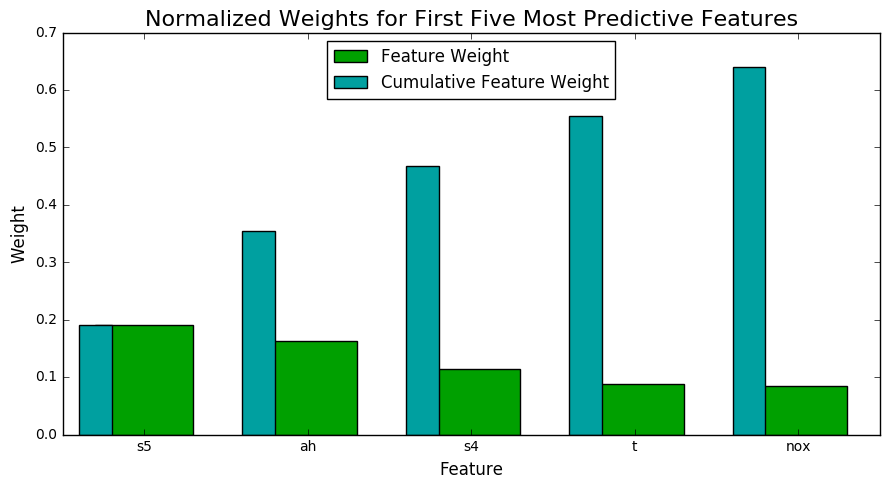

In [33]:
import visuals2 as vs
importances = GBmodel.feature_importances_

# Plot
vs.feature_plot(importances, X_train, y_train)

In [35]:
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]


results = {}


# Initialize logistic regression model
GBmodel = GradientBoostingRegressor(learning_rate=0.1, max_depth=8, n_estimators = 500)

start = time() # Get start time
GBmodel.fit(X_train_reduced,y_train)
end = time() # Get end time
results['train_time'] = end - start

start = time() # Get start time
# Make predictions
preds_train = GBmodel.predict(X_train_reduced)
preds_test = GBmodel.predict(X_test_reduced)
end = time() # Get end time
results['pred_time'] = end - start

print ("RMSE Value (Training) For Gradient Boosting: ",np.sqrt(mean_squared_error(y_train,preds_train)))
print ("RMSE Value (Test) For Gradient Boosting: ",np.sqrt(mean_squared_error(y_test,preds_test)))
print(results)

RMSE Value (Training) For Gradient Boosting:  7.242791608340243
RMSE Value (Test) For Gradient Boosting:  60.038488160762505
{'train_time': 4.970880031585693, 'pred_time': 0.14679646492004395}


#### Using only fewer features does not work well on this data. As different features might correspond to different air pollutants in the air, all features should be used. 

In [37]:
#Code to test on unseen data

from pandas import read_csv
from datetime import datetime
from math import sqrt
from time import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

#Load the test datatset
inputdataset = pd.read_csv("Data/forecasting_dataset.csv").drop(labels=['date', 'time','nhmc', 'y'], axis='columns')
dataset_num = inputdataset.drop(['level'],axis=1)
dataset_num = dataset_num[:100]

#Preprocessing test data
for e in dataset_num.columns.values:
    for i in dataset_num.ix[dataset_num[e]<0].index:
        dataset_num.loc[i, e] = 0
    dataset_num[e] = dataset_num[e].fillna(0)
    dataset_num[e].replace(to_replace=0, method='ffill', inplace=True)
    dataset_num[e].replace(to_replace=0, method='bfill', inplace=True)
level_code = pd.get_dummies(inputdataset['level'])
lb_make = LabelEncoder()
encoded = list(level_code.columns)
level_code = pd.get_dummies(inputdataset['level'])
lb_make = LabelEncoder()
encoded = list(level_code.columns)
dataset_num['level_h'] = level_code['High']
dataset_num['level_vh'] = level_code['Very High']
dataset_num['level_vl'] = level_code['Very low']
dataset_num['level_l'] = level_code['Low']
dataset_num['level_m'] = level_code['Moderate']

features_raw =  dataset_num
skewed = ['co_gt','c6h6', 'nox','s3']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['co_gt','c6h6', 'nox','s3', 's2', 'no2', 's4', 's5', 't','rh', 'ah']
features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])
features_final = features_log_minmax_transform

#Predict y values after 6 six hours
pred=GBmodel1.predict(features_final)
print(pred)


[ 961.71989965  946.73846698 1377.87228151 1105.54204427 1744.11662431
 1147.20528951 1105.27780253 1238.93548289  960.45418801 1111.56143936
  864.71086906 1122.03351723  822.281383    752.14398629 1106.46621851
 1667.40680702 1384.08011372 1031.17550525 1064.10440752 1665.07653606
  898.28271575 1795.81925912  965.48905263  786.6601435  1161.16057656
 1466.81589607 1197.64599702  847.03884398  908.22042325  869.32526117
 1382.37629502 1060.18206147  994.20104082  843.54648686 1206.75412379
 1094.14325156 1318.73592948  926.68610321 1193.50051495  775.4429496
 1252.08718544 1144.83903124  957.04776108 1624.48500055 1295.86690704
 1314.46471617  957.09643425  999.74997717  770.1938761  1043.18571999
 1332.75928355 1260.01272288  965.76582202  812.73368398  928.62413848
 1072.37191542 1205.67984091 1346.32134077 1316.15506862 1131.70537813
 1068.78357471  868.04827316 1103.55271621 1430.35902901 1228.37298508
  781.79199325  819.45651955  831.67821771 1860.58332638  927.64598065
 1090.0